In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import re

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split


import xgboost as xgb

import keras 
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential

from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')
plt.style.use('Solarize_Light2')


In [2]:
df = pd.read_csv("SolarPrediction.csv")
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [3]:
df.shape

(32686, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [5]:
df1 = df.copy()

In [6]:
st = '9/29/2016 12:00:00 AM'
st.split()[0].split('/')

['9', '29', '2016']

In [7]:
df['Data'] = df['Data'].apply(lambda x: x.split()[0])

In [8]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [9]:
df['Month'] = pd.to_datetime(df['Data']).dt.month
df['day'] = pd.to_datetime(df['Data']).dt.day

df['Hour'] = pd.to_datetime(df['Time']).dt.hour
df['Minute'] = pd.to_datetime(df['Time']).dt.minute
df['Second'] = pd.to_datetime(df['Time']).dt.second


In [10]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,day,Hour,Minute,Second
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24


In [11]:
df['RiseHour'] = df['TimeSunRise'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
df['RiseMinute'] = df['TimeSunRise'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)
df['SetHour'] = df['TimeSunSet'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
df['SetMinute'] = df['TimeSunSet'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)

In [12]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Month,day,Hour,Minute,Second,RiseHour,RiseMinute,SetHour,SetMinute
0,1475229326,9/29/2016,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,23,55,26,6,13,18,13
1,1475229023,9/29/2016,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,23,50,23,6,13,18,13
2,1475228726,9/29/2016,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,23,45,26,6,13,18,13
3,1475228421,9/29/2016,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,23,40,21,6,13,18,13
4,1475228124,9/29/2016,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,23,35,24,6,13,18,13


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
 11  Month                   32686 non-null  int64  
 12  day                     32686 non-null  int64  
 13  Hour                    32686 non-null  int64  
 14  Minute                  32686 non-null

In [14]:
df.drop(['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis = 1, inplace=True)

In [15]:
df.shape

(32686, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Radiation               32686 non-null  float64
 1   Temperature             32686 non-null  int64  
 2   Pressure                32686 non-null  float64
 3   Humidity                32686 non-null  int64  
 4   WindDirection(Degrees)  32686 non-null  float64
 5   Speed                   32686 non-null  float64
 6   Month                   32686 non-null  int64  
 7   day                     32686 non-null  int64  
 8   Hour                    32686 non-null  int64  
 9   Minute                  32686 non-null  int64  
 10  Second                  32686 non-null  int64  
 11  RiseHour                32686 non-null  int32  
 12  RiseMinute              32686 non-null  int32  
 13  SetHour                 32686 non-null  int32  
 14  SetMinute               32686 non-null

In [17]:
df.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,day,Hour,Minute,Second,RiseHour,RiseMinute,SetHour,SetMinute
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,6,13,18,13
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,6,13,18,13
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,6,13,18,13
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,6,13,18,13
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,6,13,18,13


In [18]:
df.isnull().sum()

Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
Month                     0
day                       0
Hour                      0
Minute                    0
Second                    0
RiseHour                  0
RiseMinute                0
SetHour                   0
SetMinute                 0
dtype: int64

In [19]:
sum(df.duplicated())

0

$$
r=\frac{\sum\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)}{\sqrt{\sum\left(x_i-\bar{x}\right)^2 \sum\left(y_i-\bar{y}\right)^2}}
$$
- $r=$ correlation coefficient
- $x_i=$ values of the $\mathrm{x}$-variable in a sample
- $\bar{x}=$ mean of the values of the $\mathrm{x}$-variable
- $y_i=$ values of the $y$-variable in a sample
- $\bar{y}=$ mean of the values of the $y$-variable

In [20]:
df.corr()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,day,Hour,Minute,Second,RiseHour,RiseMinute,SetHour,SetMinute
Radiation,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.095450,0.039978,0.004398,-0.000730,-0.031270,NaN,-0.092850,0.048719,-0.039816
Temperature,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.354560,-0.123705,0.197464,-0.001934,-0.036147,NaN,-0.380968,0.300920,-0.242881
Pressure,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.341759,-0.024633,0.091069,0.001860,-0.031102,NaN,-0.380399,0.151939,-0.119599
Humidity,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.068854,0.014637,0.077899,0.000499,-0.027682,NaN,-0.023955,0.145143,-0.119526
WindDirection(Degrees),-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.181485,-0.082354,-0.077969,-0.000602,-0.032568,NaN,0.176929,-0.078540,0.070030
Speed,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.150822,0.117337,-0.057939,0.000192,-0.032934,NaN,0.167075,-0.159384,0.119926
Month,-0.095450,-0.354560,-0.341759,-0.068854,0.181485,0.150822,1.000000,0.038027,-0.005396,0.000168,0.220563,NaN,0.952472,-0.784783,0.541883
day,0.039978,-0.123705,-0.024633,0.014637,-0.082354,0.117337,0.038027,1.000000,-0.008010,-0.000196,0.089078,NaN,0.274522,-0.263575,0.265662
Hour,0.004398,0.197464,0.091069,0.077899,-0.077969,-0.057939,-0.005396,-0.008010,1.000000,-0.004052,0.004199,NaN,-0.006772,0.008629,-0.007056
Minute,-0.000730,-0.001934,0.001860,0.000499,-0.000602,0.000192,0.000168,-0.000196,-0.004052,1.000000,0.002517,NaN,-0.000158,0.001052,-0.002215


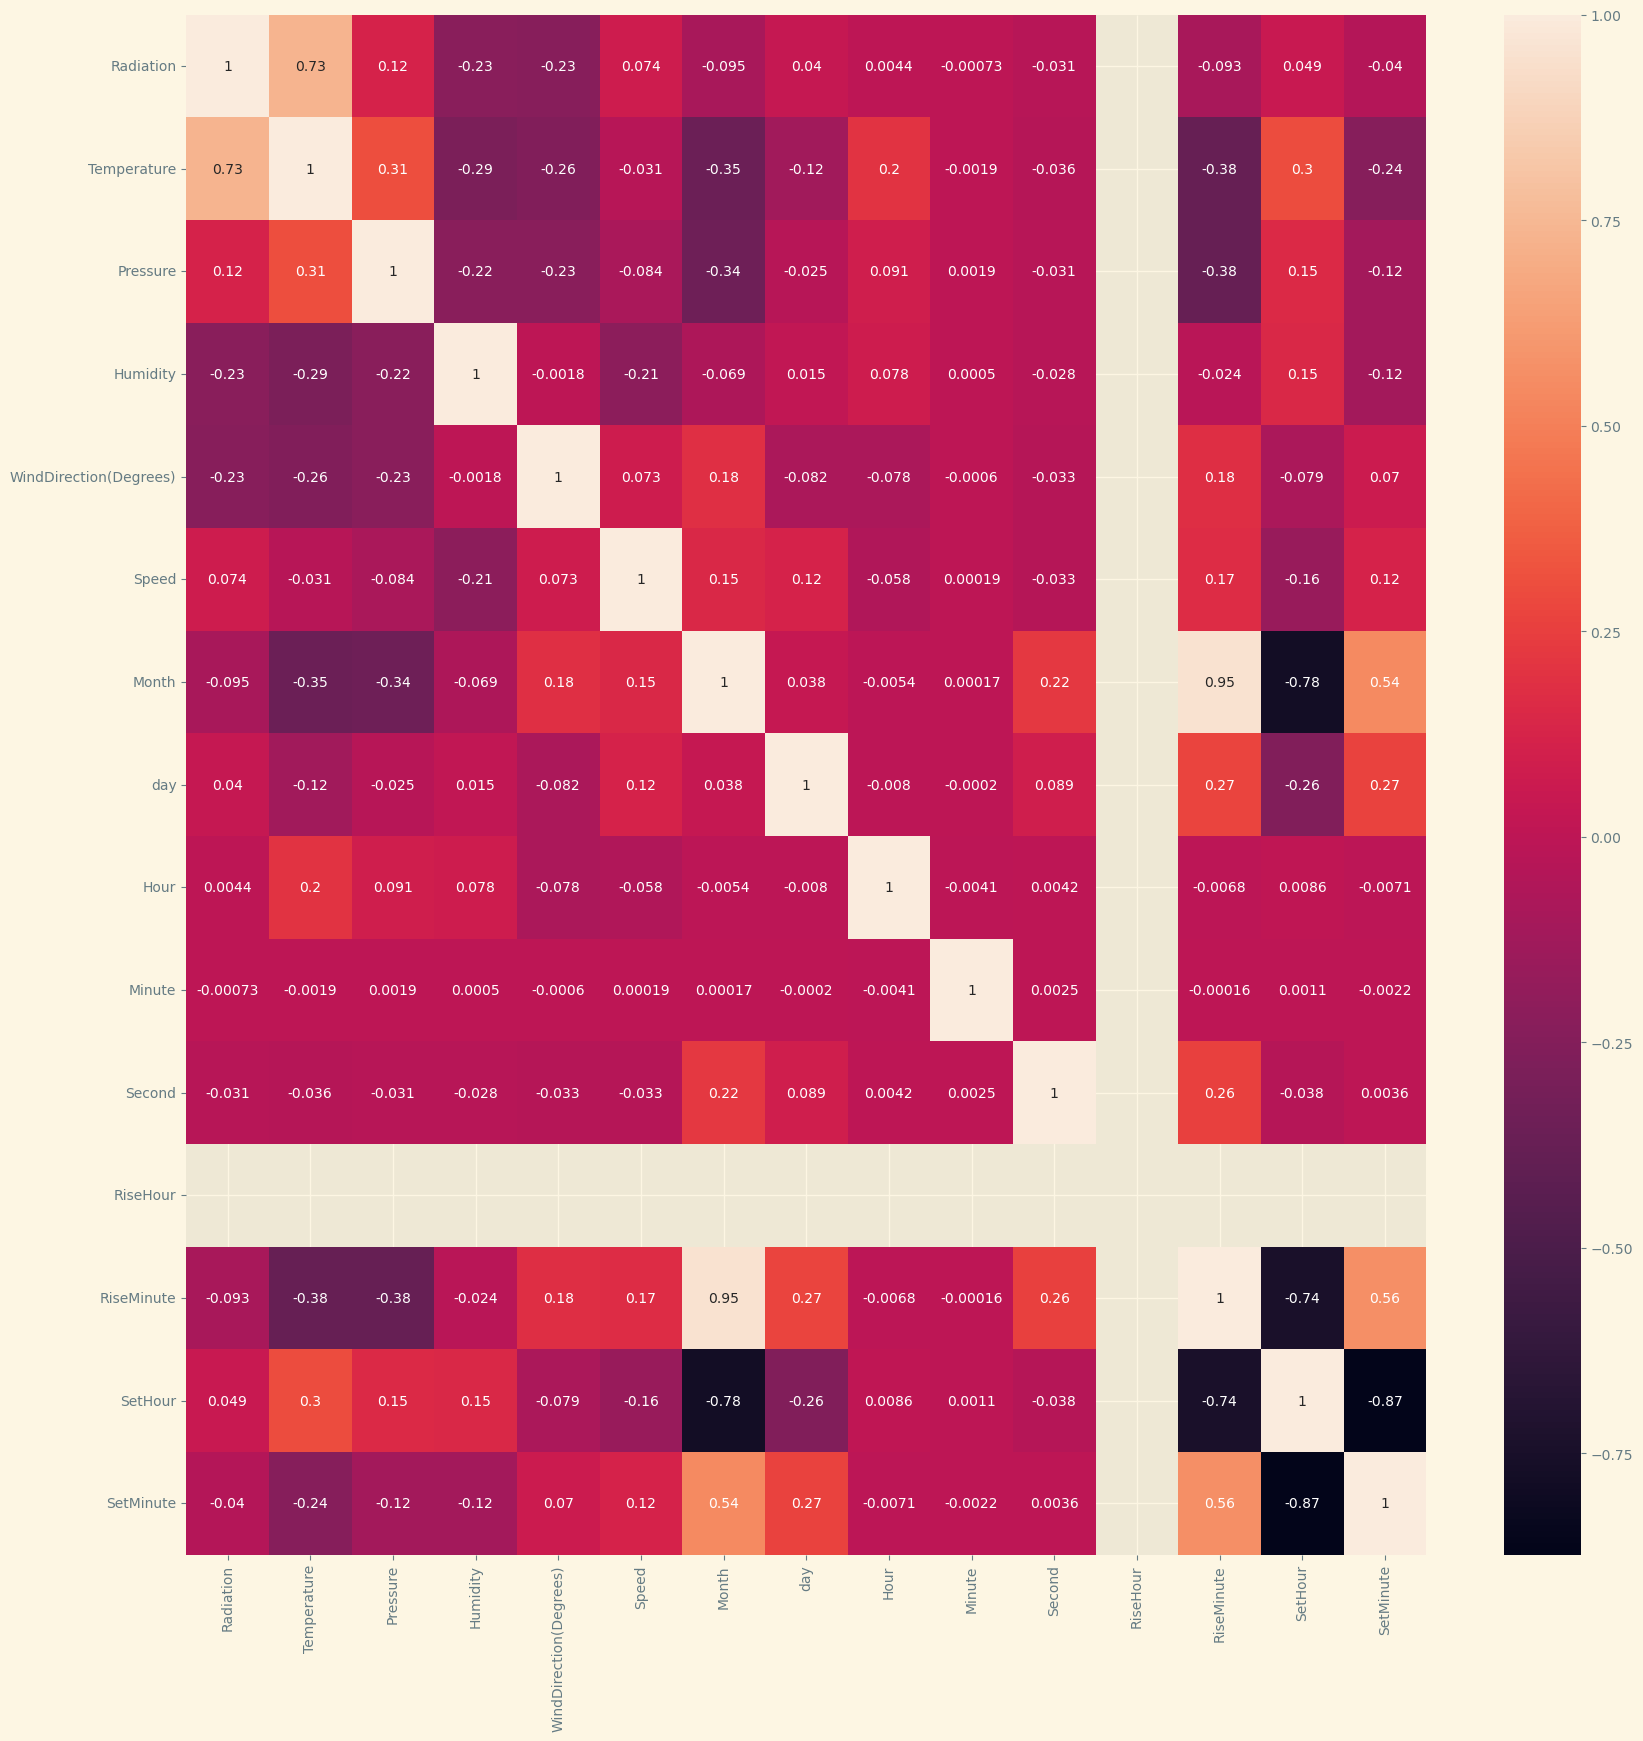

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [22]:
bestFeature = SelectKBest(score_func = chi2, k = 10)

In [23]:
input_features = df.drop('Radiation', axis = 1)
target = df['Radiation']

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_Y = label_encoder.fit_transform(target)

In [25]:
target[:5]

0    1.21
1    1.21
2    1.23
3    1.21
4    1.17
Name: Radiation, dtype: float64

In [26]:
train_Y[:5]

array([ 9,  9, 11,  9,  5], dtype=int64)

In [27]:
target_cont = df['Radiation'].apply(lambda x: int(x*100))
target_cont[:5]

0    121
1    121
2    123
3    121
4    117
Name: Radiation, dtype: int64

In [28]:
scaled_input_features = MinMaxScaler().fit_transform(input_features)
fit = bestFeature.fit(scaled_input_features, target_cont)

In [29]:
scores = pd.DataFrame(fit.scores_)
column = pd.DataFrame(input_features.columns)

In [30]:
FeatureScores = pd.concat([column, scores], axis = 1)
FeatureScores

,0,0
0,Temperature,1651.685632
1,Pressure,523.791060
2,Humidity,1588.087433
3,WindDirection(Degrees),3271.827277
4,Speed,765.859779
5,Month,4684.579610
6,day,2841.926850
7,Hour,691.185393
8,Minute,2702.449333
9,Second,2288.673032


In [31]:
FeatureScores.columns = ['Features', 'Feature_imp']

In [32]:
FeatureScores.sort_values(by = 'Feature_imp', ascending=False, inplace = True)

In [33]:
FeatureScores

,Features,Feature_imp
12,SetHour,12207.531454
5,Month,4684.579610
11,RiseMinute,4015.062771
3,WindDirection(Degrees),3271.827277
6,day,2841.926850
8,Minute,2702.449333
9,Second,2288.673032
13,SetMinute,1863.712087
0,Temperature,1651.685632
2,Humidity,1588.087433


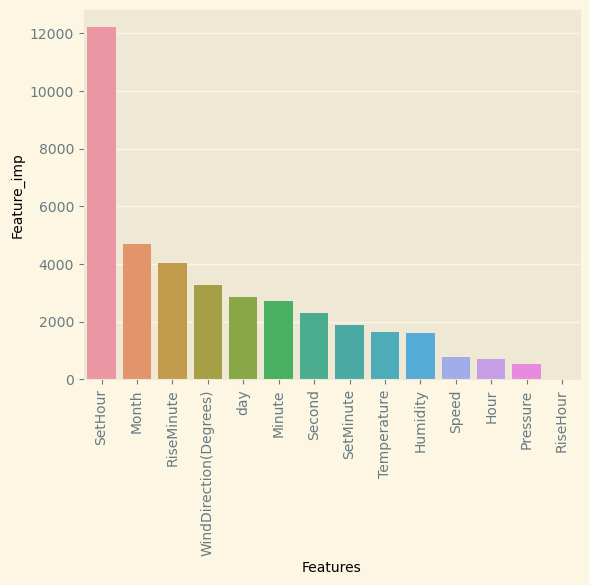

In [34]:
sns.barplot(data=FeatureScores, x = 'Features', y = 'Feature_imp')
plt.xticks(rotation = 90)
plt.show()

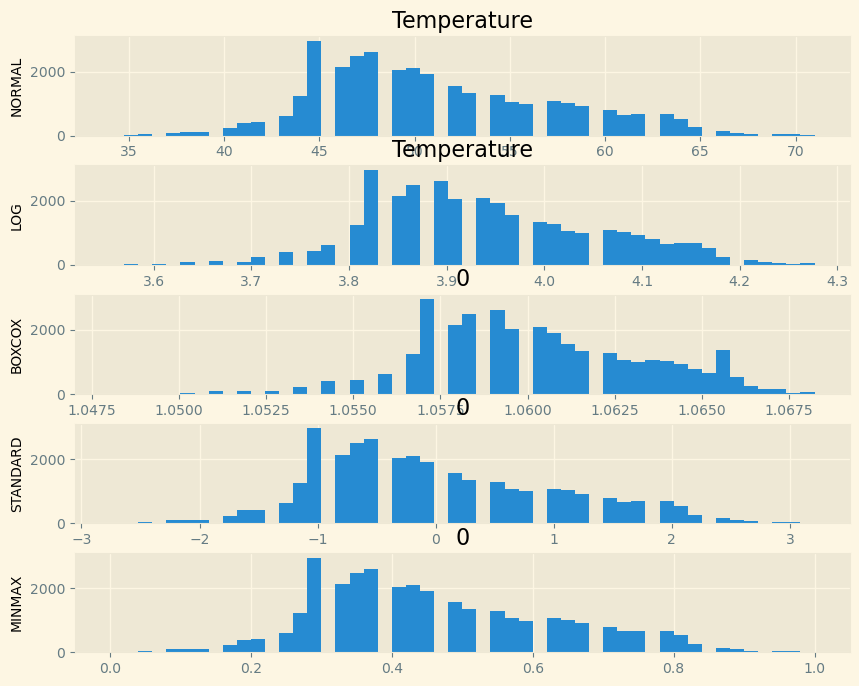

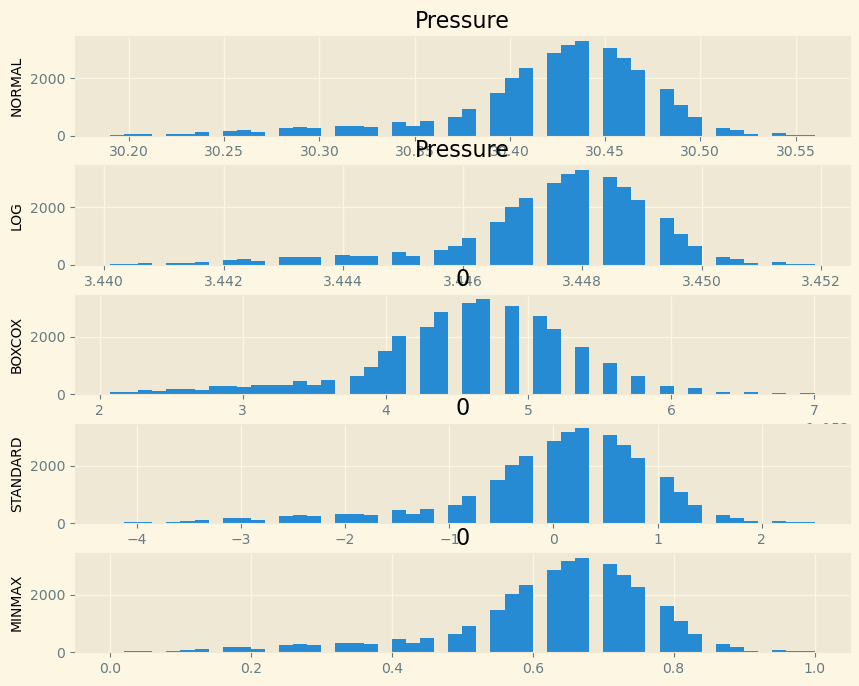

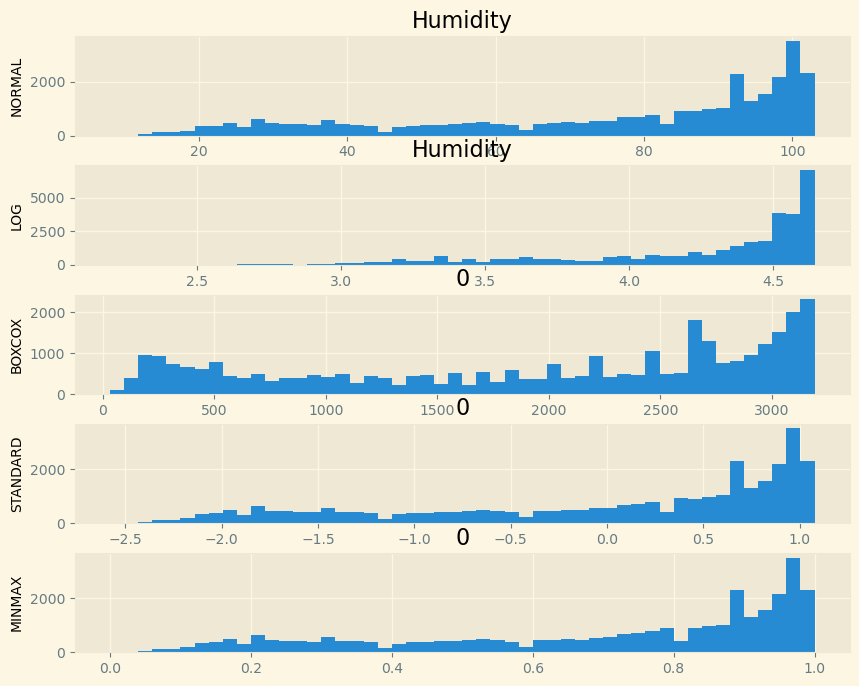

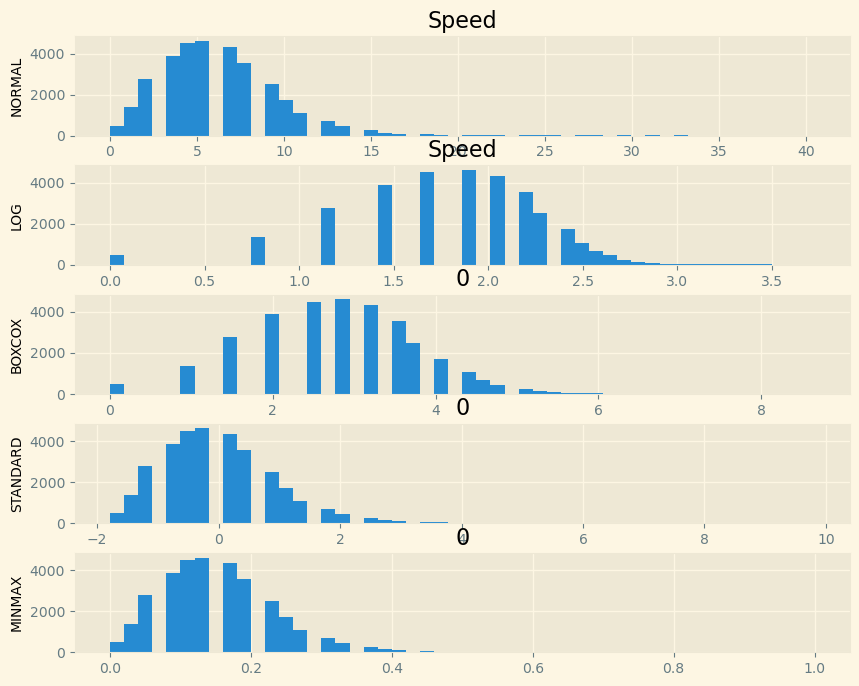

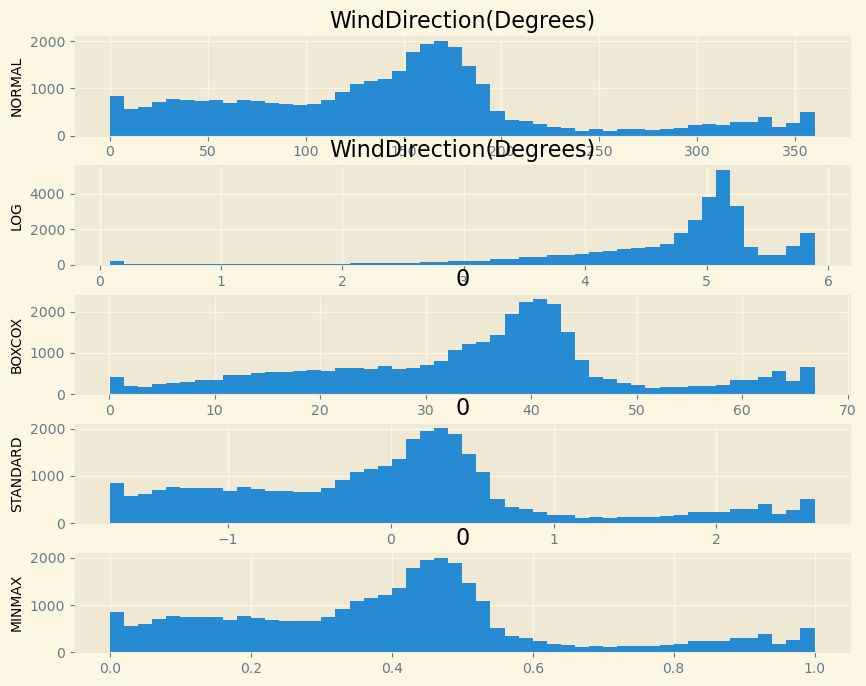

In [36]:
feature_to_transform = ['Temperature','Pressure', 'Humidity', 'Speed', 'WindDirection(Degrees)'] 

for i in feature_to_transform:
    
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize = (10,8))
    
    pd.DataFrame(input_features[i]).hist(ax = ax1, bins = 50)
    pd.DataFrame((input_features[i]+1).transform(np.log)).hist(ax = ax2, bins = 50)
    pd.DataFrame(stats.boxcox(input_features[i]+1)[0]).hist(ax = ax3, bins = 50)
    pd.DataFrame(StandardScaler().fit_transform(np.array(input_features[i]).reshape(-1,1))).hist(ax = ax4, bins = 50)
    pd.DataFrame(MinMaxScaler().fit_transform(np.array(input_features[i]).reshape(-1,1))).hist(ax = ax5, bins = 50)
    
    ax1.set_ylabel("NORMAL")
    ax2.set_ylabel("LOG")
    ax3.set_ylabel("BOXCOX")
    ax4.set_ylabel("STANDARD")
    ax5.set_ylabel("MINMAX")
    
    plt.show()

In [39]:
input_features

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,day,Hour,Minute,Second,RiseHour,RiseMinute,SetHour,SetMinute
0,48,30.46,59,177.39,5.62,9,29,23,55,26,6,13,18,13
1,48,30.46,58,176.78,3.37,9,29,23,50,23,6,13,18,13
2,48,30.46,57,158.75,3.37,9,29,23,45,26,6,13,18,13
3,48,30.46,60,137.71,3.37,9,29,23,40,21,6,13,18,13
4,48,30.46,62,104.95,5.62,9,29,23,35,24,6,13,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,44,30.43,102,145.42,6.75,12,1,0,20,4,6,41,17,42
32682,44,30.42,102,117.78,6.75,12,1,0,15,1,6,41,17,42
32683,44,30.42,102,145.19,9.00,12,1,0,10,1,6,41,17,42
32684,44,30.42,101,164.19,7.87,12,1,0,5,2,6,41,17,42


In [37]:
transform = {'Temperature': (input_features['Temperature']+1).transform(np.log),
                      'Pressure': stats.boxcox(input_features['Pressure']+1)[0],
                      'Humidity': stats.boxcox(input_features['Humidity']+1)[0],
                      'Speed': (input_features['Speed']+1).transform(np.log),
                      'WindDirection(Degrees)': MinMaxScaler().fit_transform(np.array(input_features['WindDirection(Degrees)']).reshape(-1,1))
            }

In [38]:
for i in transform:
    input_features[i] = transform[i]

In [39]:
input_features.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Month,day,Hour,Minute,Second,RiseHour,RiseMinute,SetHour,SetMinute
0,3.89182,5.044903e+152,1139.358665,0.492692,1.890095,9,29,23,55,26,6,13,18,13
1,3.89182,5.044903e+152,1104.046980,0.490996,1.474763,9,29,23,50,23,6,13,18,13
2,3.89182,5.044903e+152,1069.253545,0.440894,1.474763,9,29,23,45,26,6,13,18,13
3,3.89182,5.044903e+152,1175.187489,0.382426,1.474763,9,29,23,40,21,6,13,18,13
4,3.89182,5.044903e+152,1248.392213,0.291391,1.890095,9,29,23,35,24,6,13,18,13


In [41]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(input_features, target, test_size=0.2, random_state=1)

scalar = StandardScaler()
X_Train = scalar.fit_transform(X_Train)
X_Test = scalar.transform(X_Test)

In [42]:
print(X_Train.shape)
print(X_Test.shape)

(26148, 14)
(6538, 14)


In [43]:
from xgboost import XGBRegressor

params = {
        "learning_rate":0.1,
        "max_depth":8
}

model = XGBRegressor(**params)

In [44]:
model.fit(X_Train, Y_Train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [45]:
Y_Pred = model.predict(X_Test)

In [48]:
rmse = np.sqrt(mean_squared_error(Y_Test, Y_Pred))
r2 = r2_score(Y_Test, Y_Pred)

print("TESTING PERFORMANCE:- ")

print("RMSE :-{:.2f}".format(rmse))
print("R2      :-{:.2f}".format(r2))

TESTING PERFORMANCE:- 
RMSE :-81.87
R2      :-0.93


In [50]:
model = None
model = Sequential()
    
model.add(Dense(128, activation='relu', input_dim=14))
model.add(Dropout(0.33))
    
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(1, activation='linear'))


In [54]:
model.compile(metrics=['mse'], loss='mae', optimizer=Adam(learning_rate=0.001))
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [55]:
history = model.fit(X_Train, Y_Train, validation_split=0.1, epochs=50, batch_size=32)


Epoch 1/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 164.9573 - mse: 97756.2188 - val_loss: 77.3685 - val_mse: 22137.3359
Epoch 2/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 87.8934 - mse: 29119.3809 - val_loss: 69.5810 - val_mse: 18600.3926
Epoch 3/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 80.9089 - mse: 25395.4121 - val_loss: 64.2138 - val_mse: 15896.8428
Epoch 4/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 78.1541 - mse: 23391.4082 - val_loss: 63.7010 - val_mse: 16046.3877
Epoch 5/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 74.4134 - mse: 21593.3418 - val_loss: 57.7757 - val_mse: 13437.5615
Epoch 6/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 72.6697 - mse: 20530.3398 - val_loss: 56.0977 - val_mse: 13147.6777
Epoch 7/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 72.1463 - mse: 20623.9961 - val_loss: 55.8911 - val_mse: 12964.1865
Epoch 8/50
736/736 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 69.9000 - mse: 19430.2461 - val_loss: 52.31

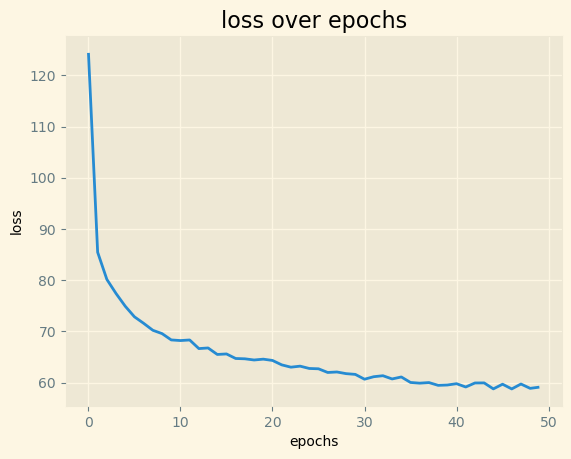

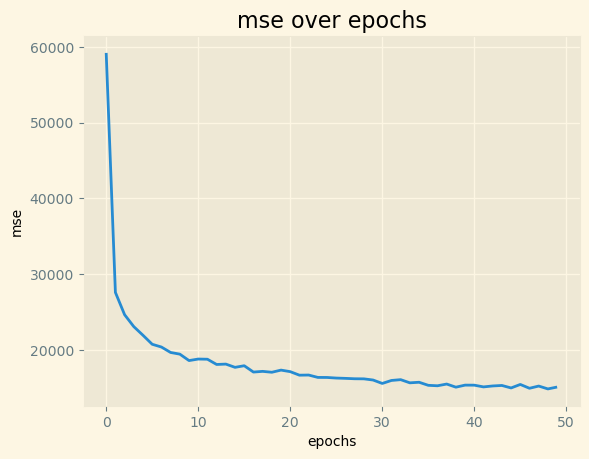

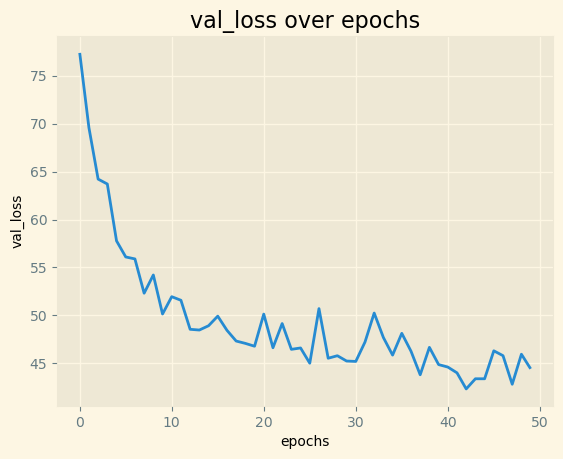

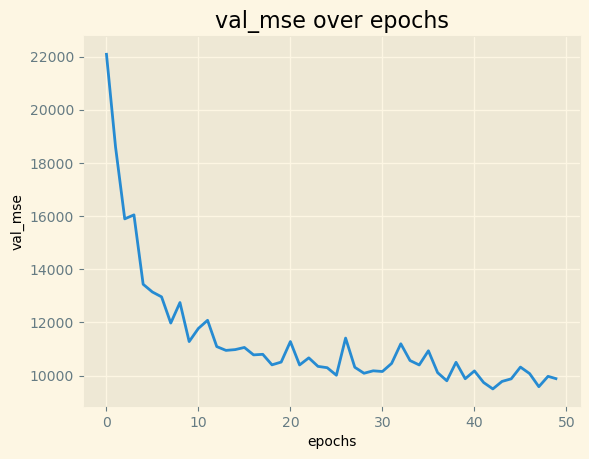

In [56]:
fit = history.history
for i in fit:
    plt.plot(fit[i])
    plt.title(i + ' over epochs')
    plt.ylabel(i)
    plt.xlabel('epochs')
    plt.show()

In [58]:
scores = model.evaluate(X_Test, Y_Test)
mae = scores[0]
mse = scores[1]
print('Mean absolute error: ', mae)

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 43.5616 - mse: 9654.7227
Mean absolute error:  42.12260818481445


In [61]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_Test, model.predict(X_Test))
print("Mean Absolute Error:", mae)

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Absolute Error: 42.21339914082824
